In [11]:
import timeit
import pandas as pd
import seaborn as sns
import graspologic
from graspologic.simulations import er_np
from graspologic.plot import heatmap
from graspologic.utils import utils as gus

import matplotlib.pyplot as plt
import numpy as np

In [12]:
n_verts = []
time_orig = []
time_scipy = []

In [13]:
for N in range(50, 1001, 50):
    for _ in range(15):
        
        n_verts.append(N)
        A = np.ones((N, N))
        
        #make the node at index [N-1] only connect to self
        for i in range(N-1):
            A[i][N-1] = 0
            A[N-1][i] = 0
          
        #get time for original is_fully_connected
        start_time = timeit.default_timer()
        gus.is_fully_connected(A)
        elapsed_orig = timeit.default_timer() - start_time
        time_orig.append(elapsed_orig)
        
        #get time for scipy is_fully_connected
        start_time = timeit.default_timer()
        gus.scipy_is_fully_connected(A)
        elapsed_scipy = timeit.default_timer() - start_time
        time_scipy.append(elapsed_scipy)

In [14]:
time_orig_dict = {"time_orig": time_orig, "n_verts": n_verts}
df_orig = pd.DataFrame(data = time_orig_dict)

In [15]:
time_scipy_dict = {"time_scipy": time_scipy, "n_verts": n_verts}
df_scipy = pd.DataFrame(data = time_scipy_dict)

Text(0.5, 1.0, 'Times for original vs new is_fully_connected')

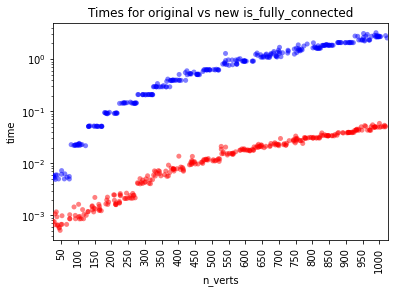

In [17]:
ax1 = sns.stripplot(data=df_orig,
    x="n_verts",
    y="time_orig",
    jitter = 0.5,
    alpha = 0.5,
    size=5,
    color='blue'
)

ax2 = sns.stripplot(data=df_scipy,
    x="n_verts",
    y="time_scipy",
    jitter = 0.5,
    alpha = 0.5,
    size=5,
    color='red'
)
ax1.set_yscale('log')
plt.xticks(rotation='vertical')
plt.ylabel('time')
plt.title("Times for original vs new is_fully_connected")